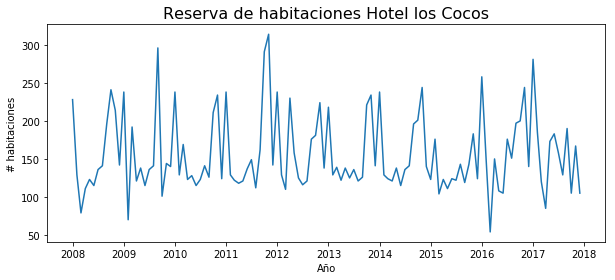

In [3]:
# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math
from matplotlib.pylab import rcParams
# data transforamtion and manipulation
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# plotting and plot styling
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"
# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_mode
# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss	

#serie de tiempo en grafico

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
data = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

#guardar en otra variable
ts = data['#guests']

#imprimir la serie de tiempo y guardarla en la carpeta imagen como referencia
plt.plot(data)
plt.title('Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel('# habitaciones')
plt.xlabel('Año')
plt.savefig('./img/serie_huespedes.png')
plt.show()

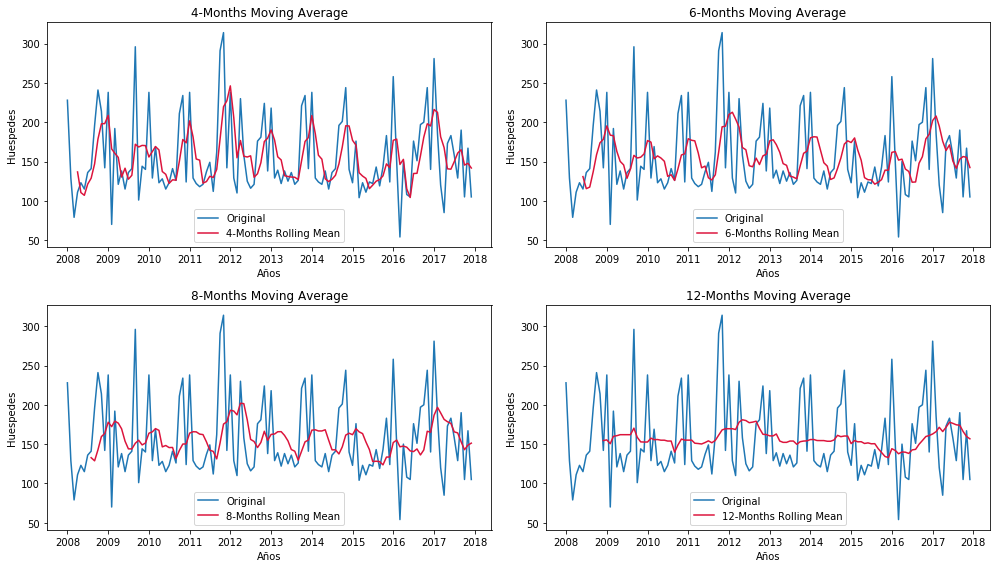

In [ ]:

#analisis de tendencia
# definir figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

# push data to each ax
#upper left
axes[0][0].plot(ts.index, ts, label='Original');
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Años");
axes[0][0].set_ylabel("Huespedes");
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best');

# upper right
axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Años");
axes[0][1].set_ylabel("Huespedes");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');

# lower left
axes[1][0].plot(ts.index, ts, label='Original');
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Años");
axes[1][0].set_ylabel("Huespedes");
axes[1][0].set_title("8-Months Moving Average");
axes[1][0].legend(loc='best');

# lower right
axes[1][1].plot(ts.index, ts, label='Original');
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Años");
axes[1][1].set_ylabel("Huespedes");
axes[1][1].set_title("12-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.savefig('./img/tendencia.png')
plt.show()

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
df = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year

# create nice axes names
month_names = pd.date_range(start='2008-01-01', periods=12, freq='MS').strftime('%b')

# reshape data using 'Year' as index and 'Month' as column
df_piv_line = df.pivot(index='Month', columns='Year', values='#guests')
df_piv_line = df_piv_line.reindex(index=month_names)
df_piv_line

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,
Jan,228,238,238,238,238,218,238,123,258,281
Feb,129,70,129,129,129,129,129,176,149,185
Mar,79,192,169,122,110,139,124,104,54,120
Apr,111,121,123,118,230,122,121,123,150,85
May,123,138,128,121,158,138,138,111,108,173
Jun,115,115,115,137,125,125,115,124,105,183
Jul,136,136,123,149,116,136,136,122,176,158
Aug,141,141,141,112,121,121,141,143,151,129
Sep,196,296,126,162,176,126,196,119,197,190


In [ ]:
# create line plot
df_piv_line.plot(colormap='jet');
plt.title('Seasonal Effect per Month', fontsize=24)
plt.ylabel('Huespuedes')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./img/seasonal_effect_lines.png')
plt.show()

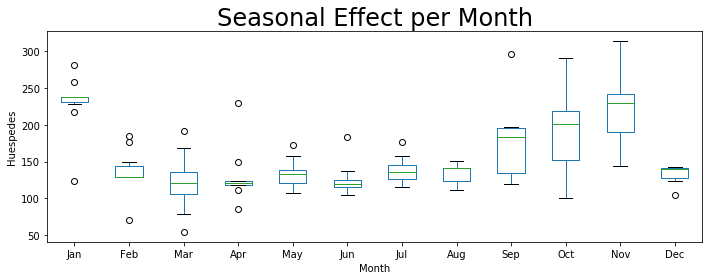

In [4]:
# create new columns to DataFrame by extracting a string representing 
# the time under the control of an explicit format string
# '%b' extracts the month in locale's abbreviated name from the index
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#leer la data del excel de los huespedes.csv
df = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year

# create nice axes names
month_names = pd.date_range(start='2008-01-01', periods=12, freq='MS').strftime('%b')

# reshape date
df_piv_box = df.pivot(index='Year', columns='Month', values='#guests')

# reindex pivot table with 'month_names'
df_piv_box = df_piv_box.reindex(columns=month_names)

# create a box plot
fig, ax = plt.subplots();
df_piv_box.plot(ax=ax, kind='box');
ax.set_title('Seasonal Effect per Month', fontsize=24);
ax.set_xlabel('Month');
ax.set_ylabel('Huespedes');
ax.xaxis.set_ticks_position('bottom');
fig.tight_layout();
plt.savefig('./img/seasonal_effect_boxplot.png')
plt.show()

In [5]:
y = data['#guests']
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)
adf_test(y)    

Results of Augmented Dickey-Fuller test:
test statistic          -2.47192
p-value                  0.12246
# of lags               11.00000
# of observations      108.00000
Critical Value (1%)     -3.49240
Critical Value (5%)     -2.88870
Critical Value (10%)    -2.58126
dtype: float64


In [6]:
def ts_diagnostics(y, lags=None, title='', filename=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = pd.rolling_mean(y, window=12)
    rolling_std = pd.rolling_std(y, window=12)
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.savefig('./img/{}.png'.format(filename))
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

No handles with labels found to put in legend.


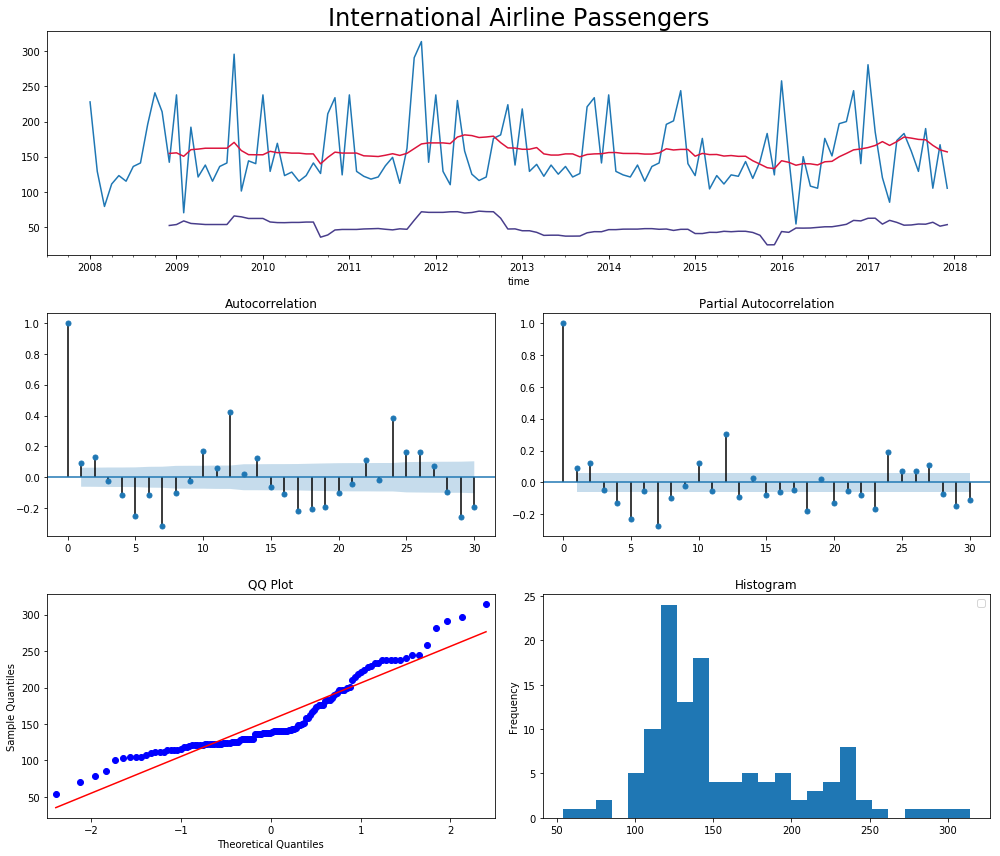

Results of Dickey-Fuller test:
test statistic          -2.47192
p-value                  0.12246
# of lags               11.00000
# of observations      108.00000
Critical Value (1%)     -3.49240
Critical Value (5%)     -2.88870
Critical Value (10%)    -2.58126
dtype: float64


In [20]:
ts_diagnostics(y, lags=30, title='International Airline Passengers', filename='adf_data')


No handles with labels found to put in legend.


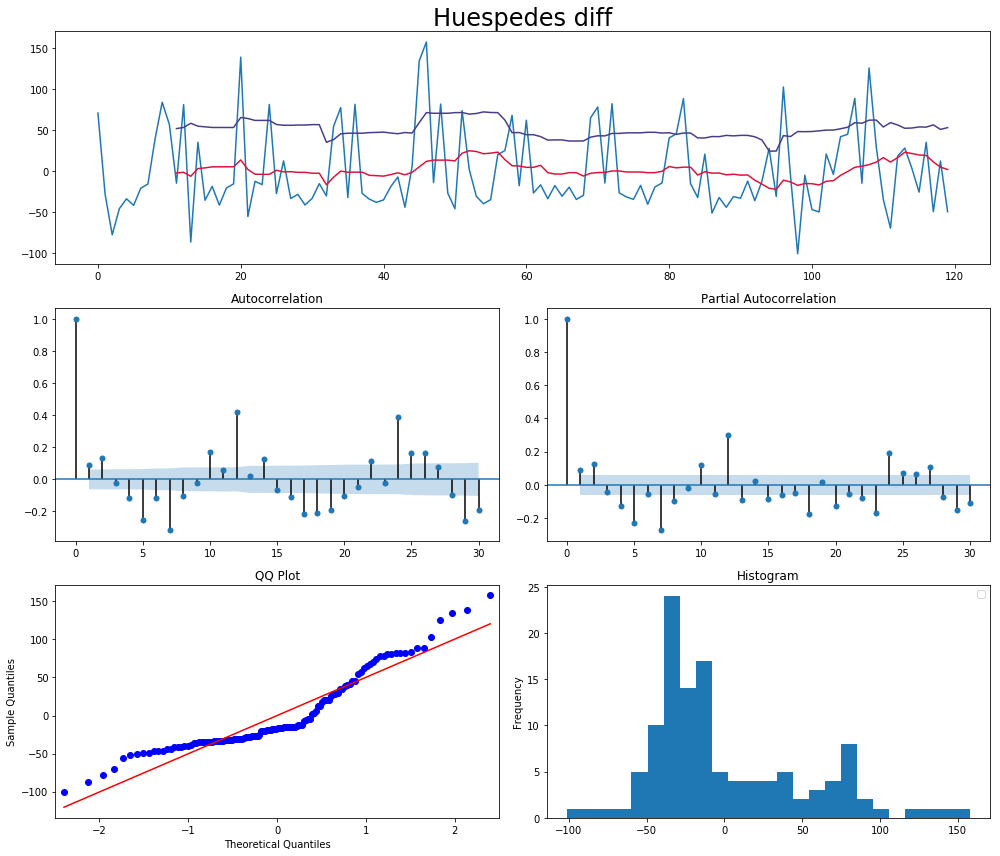

Results of Dickey-Fuller test:
test statistic          -2.49616
p-value                  0.11641
# of lags               11.00000
# of observations      108.00000
Critical Value (1%)     -3.49240
Critical Value (5%)     -2.88870
Critical Value (10%)    -2.58126
dtype: float64


In [21]:
from scipy import signal
y_detrend = signal.detrend(y)
y_diff = np.diff(y)
ts_diagnostics(y_detrend, lags=30, title='Huespedes diff', filename='adf_diff')

No handles with labels found to put in legend.


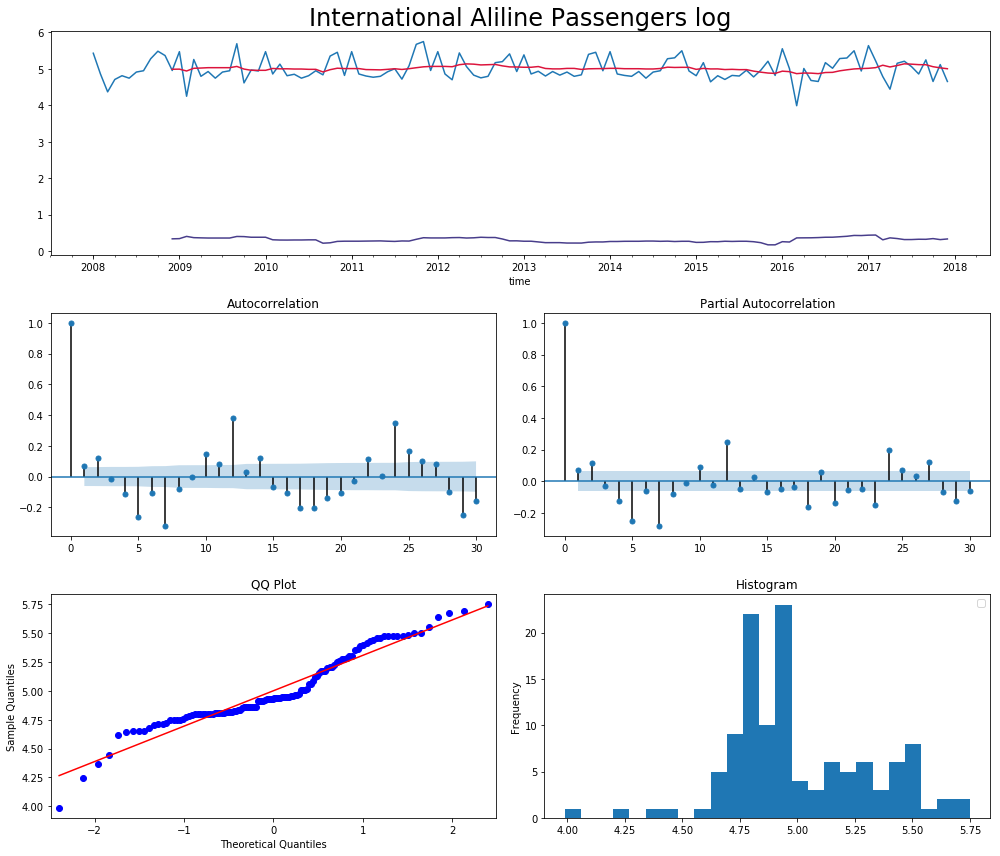

Results of Dickey-Fuller test:
test statistic          -2.60715
p-value                  0.09153
# of lags               11.00000
# of observations      108.00000
Critical Value (1%)     -3.49240
Critical Value (5%)     -2.88870
Critical Value (10%)    -2.58126
dtype: float64


In [22]:
y_log = np.log(y)
ts_diagnostics(y_log, lags=30, title='International Aliline Passengers log', filename='adf_log')

No handles with labels found to put in legend.


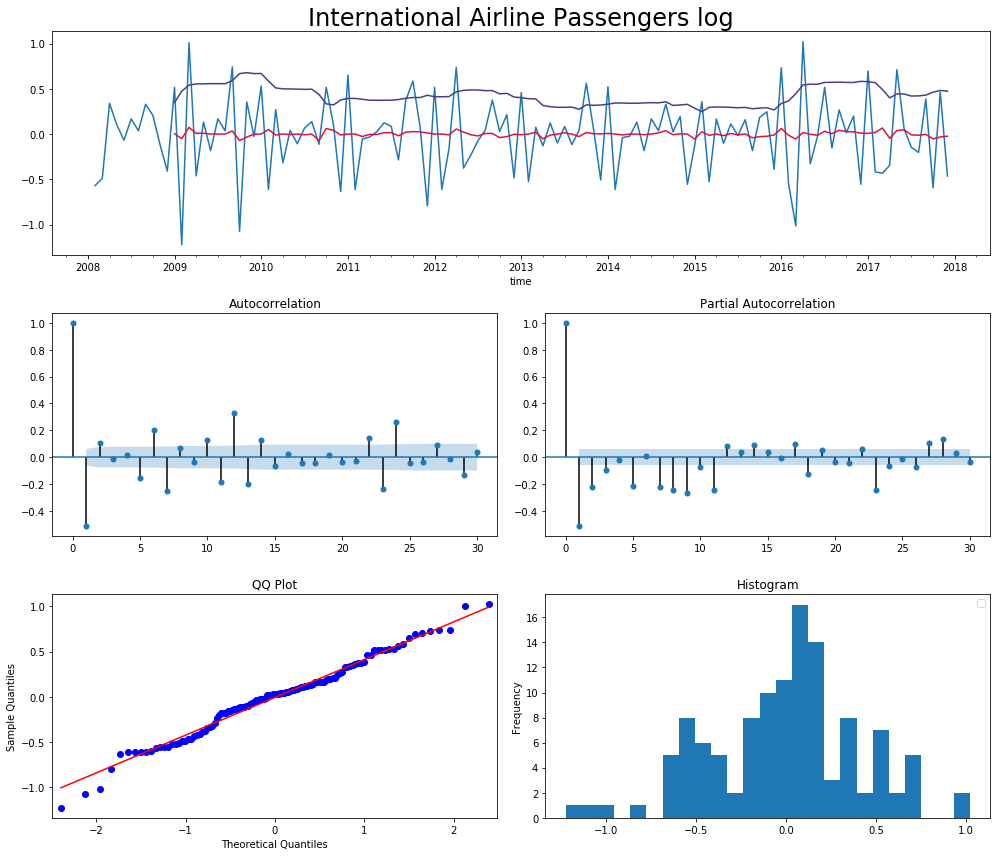

Results of Dickey-Fuller test:
test statistic          -8.37464
p-value                  0.00000
# of lags               10.00000
# of observations      108.00000
Critical Value (1%)     -3.49240
Critical Value (5%)     -2.88870
Critical Value (10%)    -2.58126
dtype: float64


In [23]:
y_log_diff = np.log(y).diff().dropna()
ts_diagnostics(y_log_diff, lags=30, title='International Airline Passengers log', filename='adf_log_diff')

No handles with labels found to put in legend.


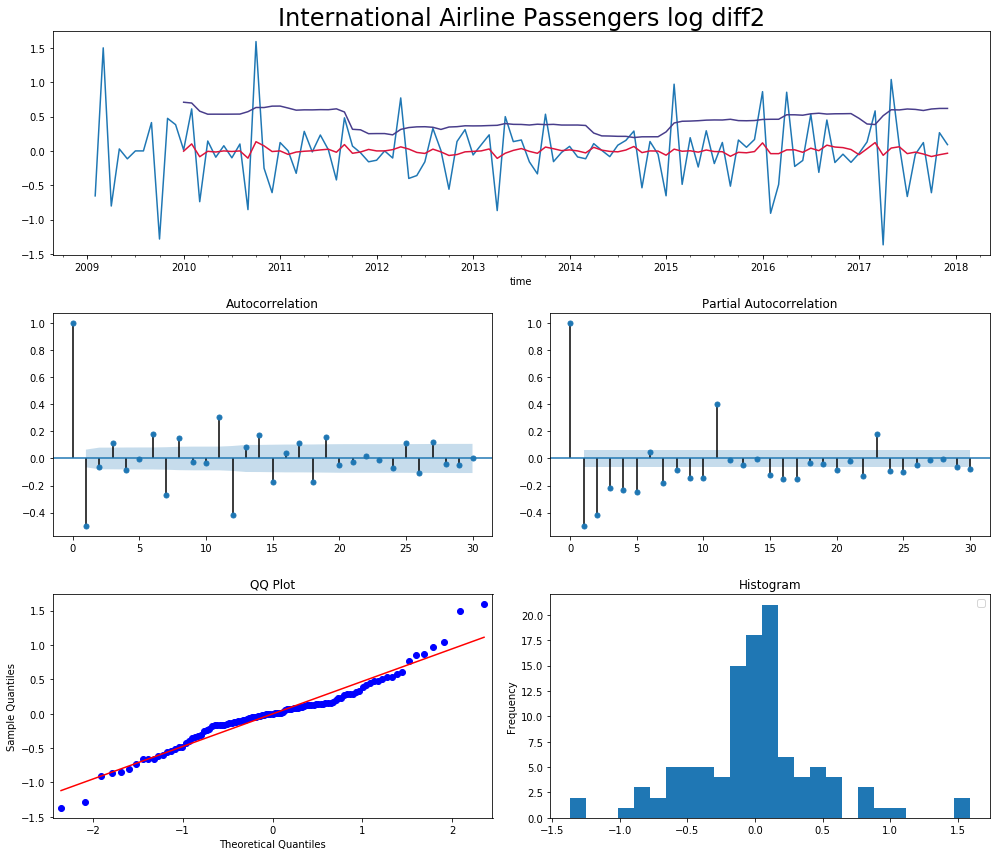

Results of Dickey-Fuller test:
test statistic         -2.33708
p-value                 0.16029
# of lags              10.00000
# of observations      96.00000
Critical Value (1%)    -3.50038
Critical Value (5%)    -2.89215
Critical Value (10%)   -2.58310
dtype: float64


In [24]:
y_log_diff2 = np.log(y).diff(1).diff(12).dropna()
ts_diagnostics(y_log_diff2, lags=30, title='International Airline Passengers log diff2', filename='adf_log_diff2')

In [7]:
#prediccion SARIMA
# split into training and test sets
y = df['#guests']
y_train = y[:'2017']
y_test = y['2016':]
y_test
y_train

time
2008-01-01    228
2008-02-01    129
2008-03-01     79
2008-04-01    111
2008-05-01    123
2008-06-01    115
2008-07-01    136
2008-08-01    141
             ... 
2017-05-01    173
2017-06-01    183
2017-07-01    158
2017-08-01    129
2017-09-01    190
2017-10-01    105
2017-11-01    167
2017-12-01    105
Name: #guests, Length: 120, dtype: int64

In [8]:
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            res = tmp_mdl.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))



1044.7049042067893
                                 Statespace Model Results                                 
Dep. Variable:                            #guests   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(2, 2, 1, 12)   Log Likelihood                -517.352
Date:                            Wed, 26 Sep 2018   AIC                           1044.705
Time:                                    01:09:19   BIC                           1058.642
Sample:                                01-01-2008   HQIC                          1050.365
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      3.201     -0.312      0.755      -7.273       5.274
ar.S.L12      -0

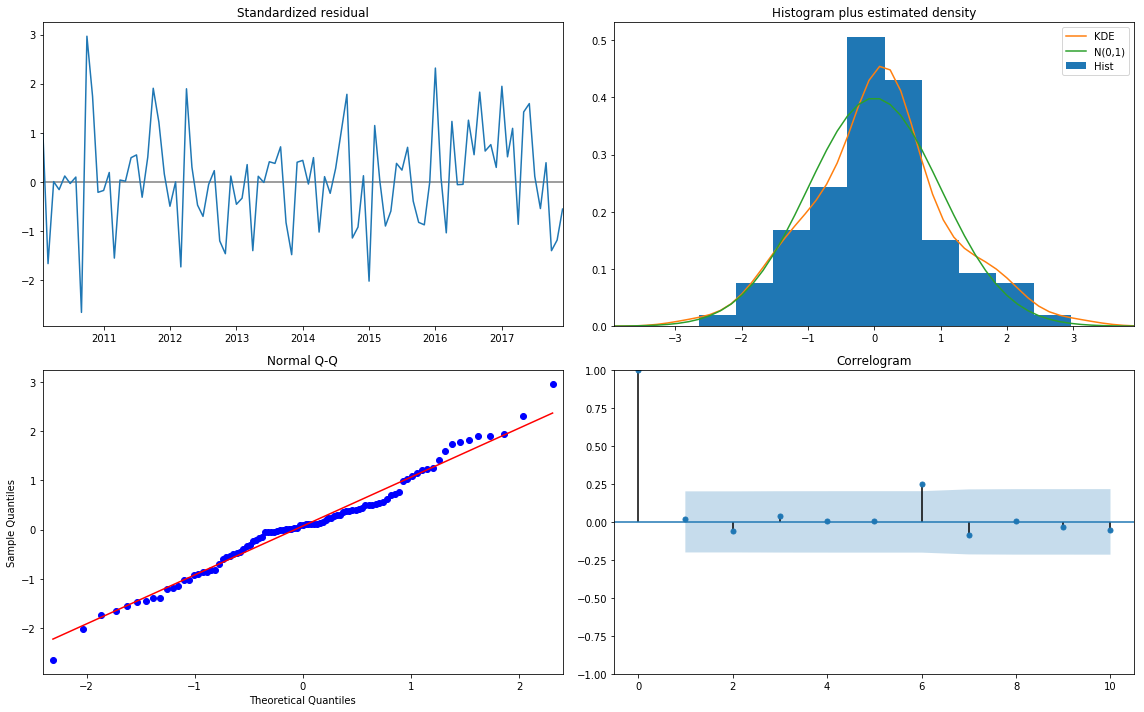

In [9]:
# define SARIMAX model and fit it to the data
mdl = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 1),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

# print statistics
print(res.aic)
print(res.summary())

from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
print(chi)
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

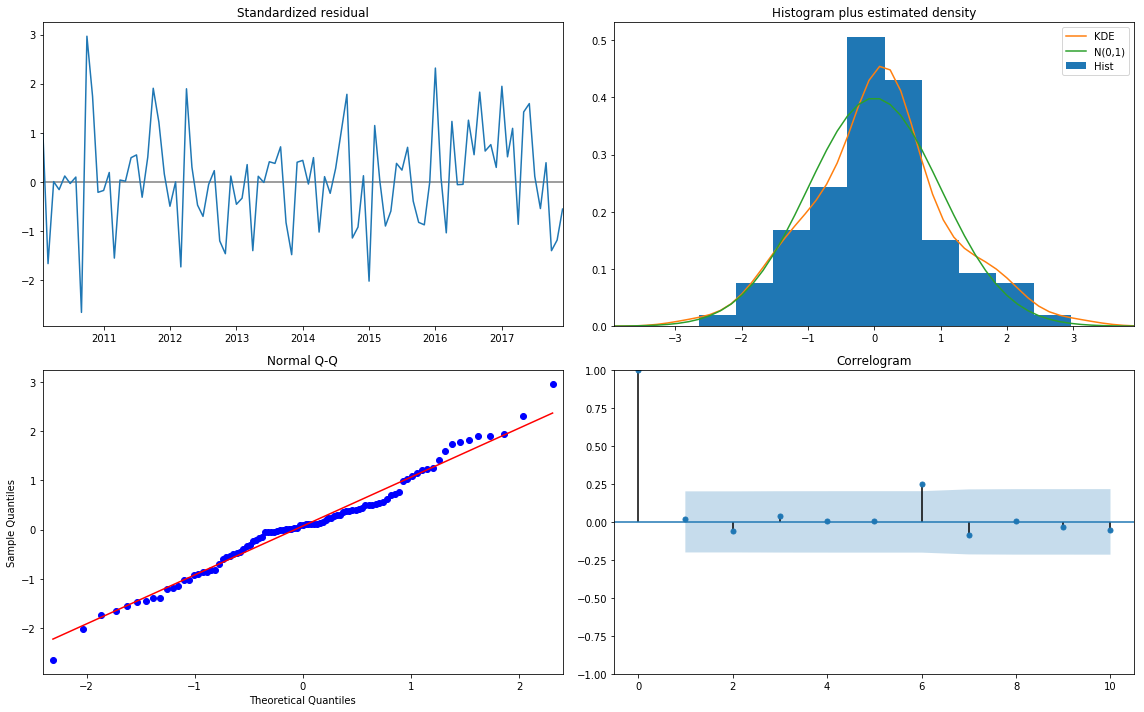

In [11]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.savefig('./img/arima_resid.png')
plt.show()

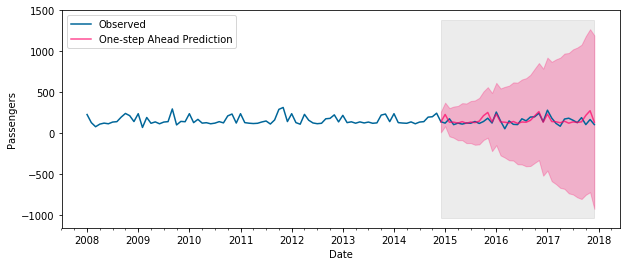

In [13]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-12-01'), 
                          end=pd.to_datetime('2017-12-01'),
                          dynamic=True)
pred_ci = pred.conf_int()

# plot in-sample-prediction
ax = y['1949':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');

# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');
plt.legend(loc='upper left');
plt.savefig('./img/in_sample_pred.png')
plt.show()

In [14]:
y_hat = pred.predicted_mean
y_true = y['2014-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 2107.93 MSE (45.91 RMSE)


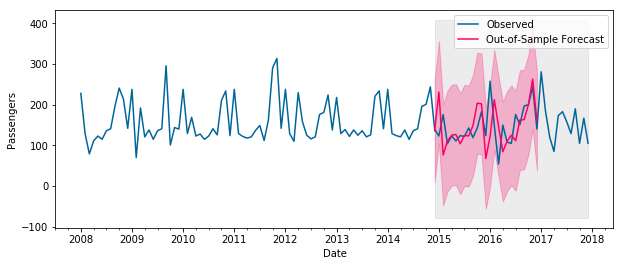

In [15]:
# predict out of sample and find confidence bounds
pred_out = res.get_prediction(start=pd.to_datetime('2014-12-01'), 
                              end=pd.to_datetime('2016-12-01'), 
                              dynamic=False, full_results=True)
pred_out_ci = pred_out.conf_int()

# plot time series and out of sample prediction
ax = y['1949':].plot(label='Observed', color='#006699')
pred_out.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(pred_out_ci.index,
                pred_out_ci.iloc[:, 0],
                pred_out_ci.iloc[:, 1], color='#ff0066', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.savefig('./img/out_of_sample_pred.png')
plt.show()

In [16]:
# extract the predicted and true values of our time series
y_hat = pred_out.predicted_mean
y_true = y['2014-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 2924.90 MSE (54.08 RMSE)


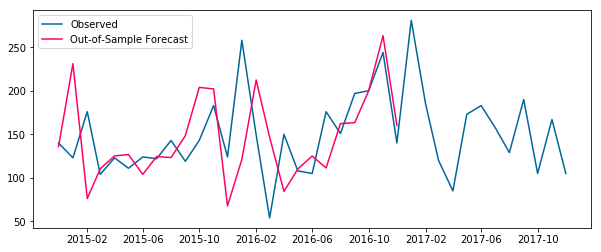

In [17]:

plt.plot(y_true, label='Observed', color='#006699')
plt.plot(y_hat, label='Out-of-Sample Forecast', color='#ff0066')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend(loc='upper left');
plt.savefig('./img/out_of_sample_comparison.png')
plt.show()